In [1]:
%matplotlib inline

from plotting_lighterbg import plot_surf_stat_map, crop_img, create_fig, create_fig_both
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, time, datetime
import numpy as np, nibabel as nib
import seaborn as sns
sns.set_context('talk')

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
docDir = '/afs/cbs.mpg.de/projects/mar005_lsd-lemon-surf/documents'
df = pd.read_pickle(max(glob.iglob('%s/data_grouplevel/lsd_data_grouplevel_20*.pkl' % docDir), 
                        key=os.path.getctime))
df = df[df['sample'] == 'LSD subjects']

fsDir = "/afs/cbs.mpg.de/projects/mar004_lsd-lemon-preproc/freesurfer"

### Renormalizing distance to mm using group average of geodesic distance

In [5]:
gr_dist = np.load('%s/data_grouplevel/lsd_geoDist_groupmean_lh.npy' % docDir)
renorm_lh = gr_dist.max()

gr_dist = np.load('%s/data_grouplevel/lsd_geoDist_groupmean_rh.npy' % docDir)
renorm_rh = gr_dist.max()


gr_dist = np.load('/scr/liberia1/data/distconnect/group_level/lsd_euclDist_groupmean_lh.npy')
renorm_eucl_lh = gr_dist.max()

gr_dist = np.load('/scr/liberia1/data/distconnect/group_level/lsd_euclDist_groupmean_rh.npy')
renorm_eucl_rh = gr_dist.max()


# Group-level average meanDist maps

## group averages for each hemisphere across thresholds projected to the surface

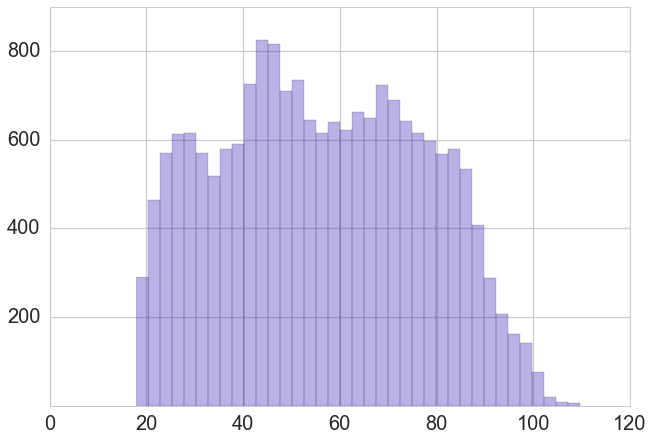

In [38]:
f, ax = plt.subplots()

sns.set_style('whitegrid')
sns.distplot(np.hstack((data_lh[cort_lh], data_rh[cort_rh])), kde=False, color="#533cc6")


#plt.ylabel('Count', fontsize=20)
plt.yticks([200, 400, 600, 800],fontsize=20)


#plt.xlabel('Distance to connected areas (mm)', fontsize=20)
plt.xticks(fontsize=20)
#plt.savefig('/scr/hunte1/sabine/distconnect/figures/images/2_histo.png', dpi=600)


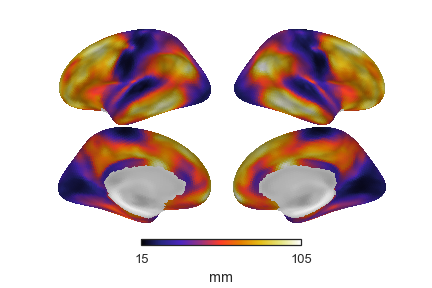

In [28]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'
thr = 98


data_lh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == 'lh')]) * renorm_lh
cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

data_rh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == 'rh')]) * renorm_rh
cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))



create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
               dmin=15, dmax=105, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
               cbar_label='mm', file_name='/scr/hunte1/sabine/distconnect/figures/images/2_grp_cd_2pcnt')#, alpha=.55)

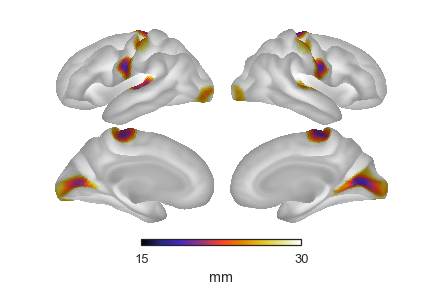

In [35]:
# zooming into variance of low values

sns.set_style('white')
surf = 'smoothwm'
sulc = 'True'
thr = 98


data_lh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == 'lh')]) * renorm_lh
cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

data_rh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == 'rh')]) * renorm_rh
cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))



create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
               dmin=15, dmax=30, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
               cbar_label='mm')#, file_name='/scr/hunte1/sabine/distconnect/figures/images/2_grp_cd_2pcnt_zoom')#, alpha=.55)

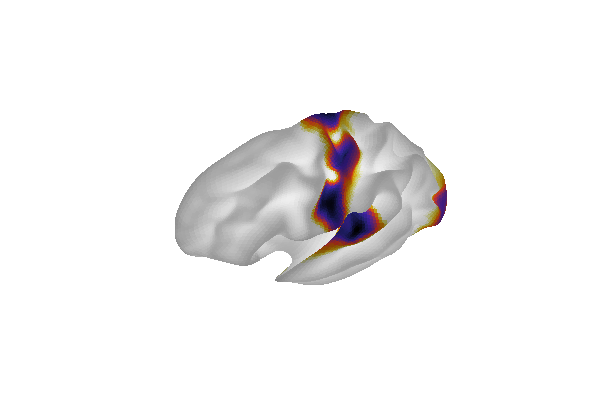

In [105]:
hemi = 'lh'
surf = 'smoothwm'
thr = 98
azim = 155
elev = 35#30

file_name = '/SCR/sabine/distconnect/figures/images/2_grp_cd_2pcnt_zoom_lateral_%s' % hemi


if hemi == 'lh':
    renorm = renorm_lh
    cort = cort_lh
else:
    renorm = renorm_rh
    cort = cort_rh

fsDir = '/afs/cbs.mpg.de/projects/mar004_lsd-lemon-preproc/freesurfer'
surf_f = '%s/fsaverage5/surf/%s.%s' % (fsDir, hemi, surf)
coords = nib.freesurfer.io.read_geometry(surf_f)[0]
faces = nib.freesurfer.io.read_geometry(surf_f)[1]
sulc_f = '%s/fsaverage5/surf/%s.sulc' % (fsDir, hemi)
sulc = nib.freesurfer.io.read_morph_data(sulc_f)
cmap='CMRmap'


data = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == hemi)]) * renorm



fig = plot_surf_stat_map(coords, faces, stat_map=data,
                                     elev=elev, azim=azim,
                                     cmap=cmap,
                                     cbar='sequential',
                                     bg_map=sulc,bg_on_stat=True,
                                     vmin=18, vmax=40,
                                     mask=cort, mask_lenient=False,
                                     file_name='%s.png' % (file_name))
                                     #label_cpal=cpal)

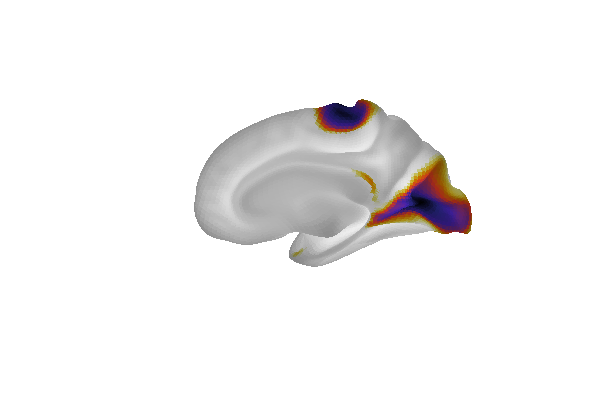

In [104]:
hemi = 'rh'
surf = 'smoothwm'
thr = 98
azim = 200
elev = 10

file_name = '/SCR/sabine/distconnect/figures/images/2_grp_cd_2pcnt_zoom_medial_%s' % hemi


if hemi == 'lh':
    renorm = renorm_lh
    cort = cort_lh
else:
    renorm = renorm_rh
    cort = cort_rh

fsDir = '/afs/cbs.mpg.de/projects/mar004_lsd-lemon-preproc/freesurfer'
surf_f = '%s/fsaverage5/surf/%s.%s' % (fsDir, hemi, surf)
coords = nib.freesurfer.io.read_geometry(surf_f)[0]
faces = nib.freesurfer.io.read_geometry(surf_f)[1]
sulc_f = '%s/fsaverage5/surf/%s.sulc' % (fsDir, hemi)
sulc = nib.freesurfer.io.read_morph_data(sulc_f)
cmap='CMRmap'


data = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == str(thr)) 
                                                             & (df['hemisphere'] == hemi)]) * renorm



fig = plot_surf_stat_map(coords, faces, stat_map=data,
                                     elev=elev, azim=azim,
                                     cmap=cmap,
                                     cbar='sequential',
                                     bg_map=sulc,bg_on_stat=True,
                                     vmin=18, vmax=40,
                                     mask=cort, mask_lenient=False,
                                     file_name='%s.png' % (file_name))
                                     #label_cpal=cpal)

## for evaluation figure in supplementaries: effect of distance type and threshold

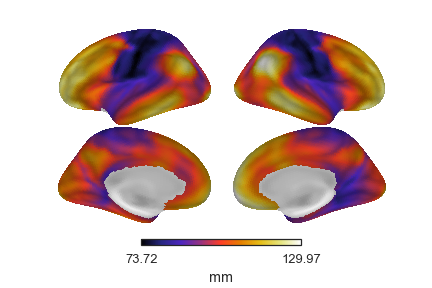

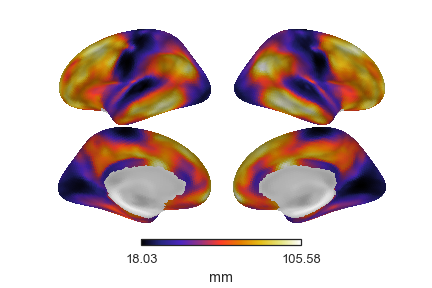

In [6]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) * renorm_lh
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['mean distance (geodesic) - group mean'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) * renorm_rh
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
                   dmin=dmin, dmax=dmax, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_maps_geo_%s' %thr)

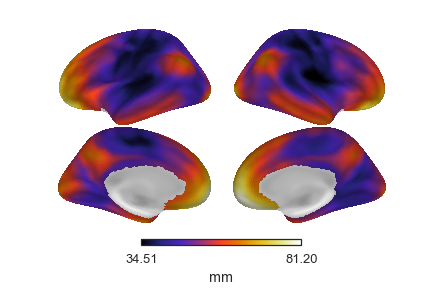

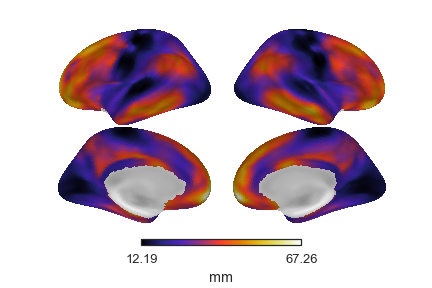

In [7]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['mean distance (euclidean) - group mean'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) * renorm_eucl_lh
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['mean distance (euclidean) - group mean'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) * renorm_eucl_rh
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
                   dmin=dmin, dmax=dmax, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_maps_eucl_%s' %thr)

### standard deviation across subjects

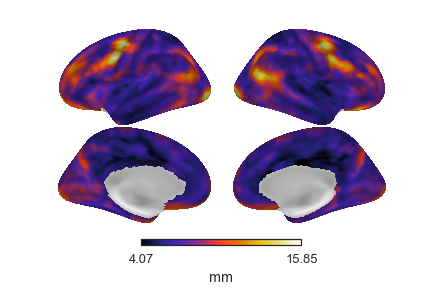

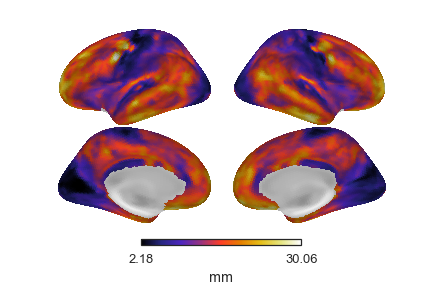

In [9]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['mean distance (geodesic) - standard deviation across subjects'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) * renorm_lh
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['mean distance (geodesic) - standard deviation across subjects'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) * renorm_rh
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
                   dmin=dmin, dmax=dmax, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_std_geo_%s' %thr)

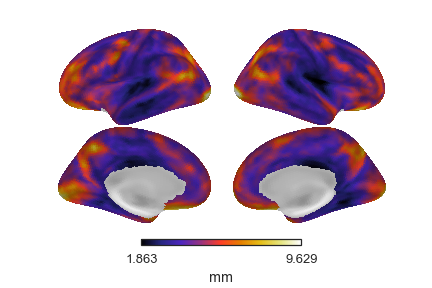

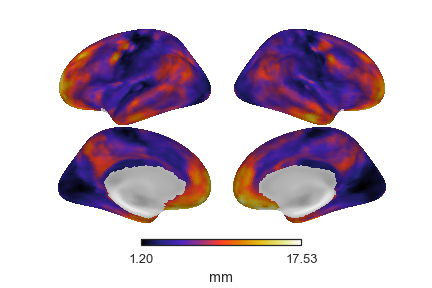

In [10]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['mean distance (euclidean) - standard deviation across subjects'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) * renorm_eucl_lh
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['mean distance (euclidean) - standard deviation across subjects'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) * renorm_eucl_rh
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
                   dmin=dmin, dmax=dmax, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_std_eucl_%s' %thr)

### Test-retest reliability (Intra-class correlation)

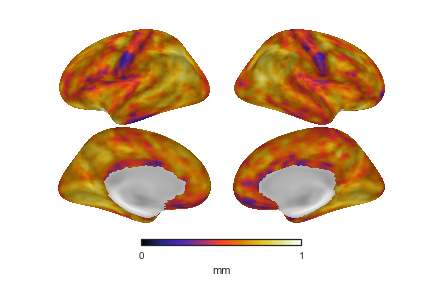

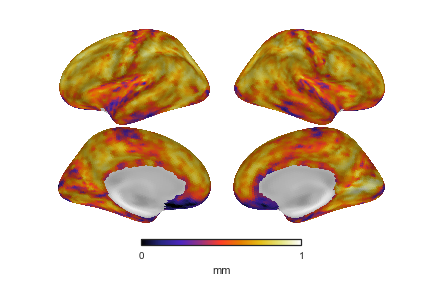

In [32]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['trt2_geo_icc'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) 
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['trt2_geo_icc'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) 
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',
                   dmin=0, dmax=1, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_icc_geo_%s' %thr)

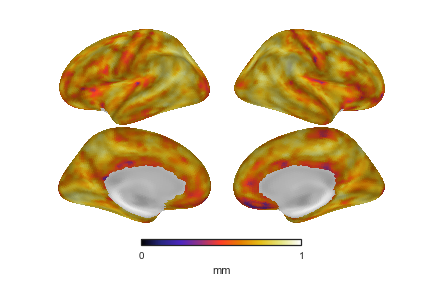

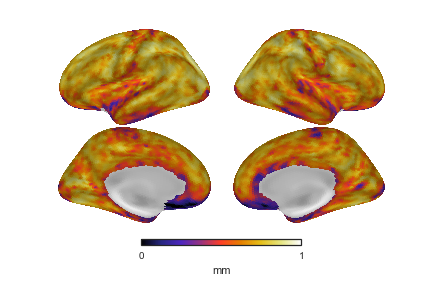

In [33]:
sns.set_style('white')
surf = 'inflated'
sulc = 'True'

for thr in ['70', '98']:


    data_lh = np.array(df['trt2_eucl_icc'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'lh')]) 
    cort_lh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'lh')))

    data_rh = np.array(df['trt2_eucl_icc'][(df['threshold'] == thr) 
                                                                 & (df['hemisphere'] == 'rh')]) 
    cort_rh = np.sort(nib.freesurfer.io.read_label('%s/fsaverage5/label/%s.cortex.label' % (fsDir, 'rh')))

    dmin = np.mean([data_rh[np.nonzero(data_rh)[0]].min(), data_lh[np.nonzero(data_lh)[0]].min()])
    dmax = np.mean([data_rh[np.nonzero(data_rh)[0]].max(), data_lh[np.nonzero(data_lh)[0]].max()])

    create_fig_both((data_lh, data_rh), surf=surf, cmap='CMRmap',#'nipy_spectral', 
                   dmin=0, dmax=1, sulc=sulc, cbar=True, mask=(cort_lh, cort_rh),
                   cbar_label='mm',
                    file_name='/scr/hunte1/sabine/distconnect/figures/images/suppl_icc_eucl_%s' %thr)

# Threshold evaluation

In [13]:
# renormalizing distance to mm

df['renorm_geo'] = np.nan
df['renorm_geo'][df['hemisphere'] == 'lh'] = renorm_lh
df['renorm_geo'][df['hemisphere'] == 'rh'] = renorm_rh
df['renormed mean distance (geodesic) - group mean'] = df['renorm_geo'] * df['mean distance (geodesic) - group mean']


df['renorm_eucl'] = np.nan
df['renorm_eucl'][df['hemisphere'] == 'lh'] = renorm_eucl_lh
df['renorm_eucl'][df['hemisphere'] == 'rh'] = renorm_eucl_rh
df['renormed mean distance (euclidean) - group mean'] = df['renorm_eucl'] * df['mean distance (euclidean) - group mean']


/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


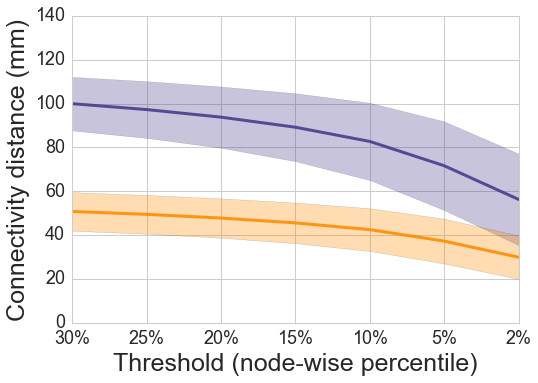

In [34]:
file_name ='/scr/hunte1/sabine/distconnect/figures/images/suppl_connectivitydistance'

sns.set(style="whitegrid")
fig, ax = plt.subplots()
cols = ['darkslateblue', 'darkorange']

for n_dist, dist in enumerate(['geodesic', 'euclidean']):

    # set params
    dep_var = "renormed mean distance (%s) - group mean" % dist
    indep_var = "threshold"
    indep_val_levels = ['70','75','80','85','90','95','98']
    x_labelticks = ['30%', '25%', '20%', '15%', '10%', '5%', '2%']
    x = np.arange(0, len(indep_val_levels), 1)

    # get data
    arr = np.zeros((18715,7))
    for n, thr in enumerate(indep_val_levels):    
        arr[:,n] = df[dep_var][(df[indep_var] == thr)
                               &(df['networks of Yeo & Krienen 2011 (7 networks solution)'] != 'medial wall')]

    # calculate mean, and upper/lower bound based on stand dev
    m = np.mean(arr, axis=0)
    high = m + np.std(arr, axis=0)
    low = m - np.std(arr, axis=0)

    # plot
    
    ax.plot(m, color=cols[n_dist], lw=3, alpha=.9)
    ax.plot(low, alpha=0)
    ax.plot(high, alpha=0)
    ax.fill_between(x, low, high, facecolor=cols[n_dist], alpha=.3)
    
    
plt.ylim(0,140)
plt.ylabel('Connectivity distance (mm)', fontsize=25)
plt.yticks(fontsize=18)

ax.set_xticklabels(x_labelticks, fontsize=18)
plt.xlabel('Threshold (node-wise percentile)', fontsize=25)
fig.savefig('%s.png' %file_name, bbox_inches='tight', dpi=600)

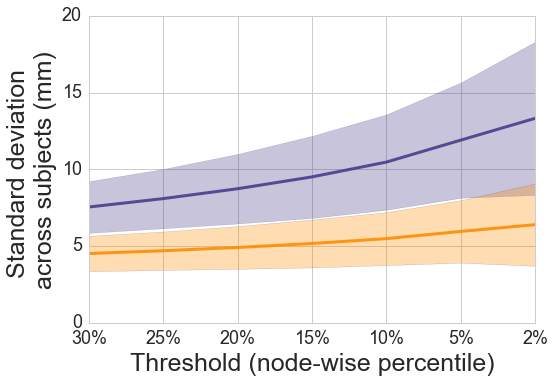

In [35]:
file_name ='/scr/hunte1/sabine/distconnect/figures/images/suppl_stdev_acr_subjects'

sns.set(style="whitegrid")
fig, ax = plt.subplots()
cols = ['darkslateblue', 'darkorange']

for n_dist, dist in enumerate(['geodesic', 'euclidean']):

    # set params
    dep_var = "renormed mean distance (%s) - standard deviation across subjects" % dist
    indep_var = "threshold"
    indep_val_levels = ['70','75','80','85','90','95','98']
    x_labelticks = ['30%', '25%', '20%', '15%', '10%', '5%', '2%']
    x = np.arange(0, len(indep_val_levels), 1)

    # get data
    arr = np.zeros((18715,7))
    for n, thr in enumerate(indep_val_levels):    
        arr[:,n] = df[dep_var][(df[indep_var] == thr)
                               &(df['networks of Yeo & Krienen 2011 (7 networks solution)'] != 'medial wall')]

    # calculate mean, and upper/lower bound based on stand dev
    m = np.mean(arr, axis=0)
    high = m + np.std(arr, axis=0)
    low = m - np.std(arr, axis=0)

    # plot
    
    ax.plot(m, color=cols[n_dist], lw=3, alpha=.9)
    ax.plot(low, alpha=0)
    ax.plot(high, alpha=0)
    ax.fill_between(x, low, high, facecolor=cols[n_dist], alpha=.3)
    
    
plt.ylim(0,20)
plt.ylabel('Standard deviation \nacross subjects (mm)', fontsize=25)
plt.yticks(fontsize=18)

ax.set_xticklabels(x_labelticks, fontsize=18)
plt.xlabel('Threshold (node-wise percentile)', fontsize=25)
fig.savefig('%s.png' %file_name, bbox_inches='tight', dpi=600)

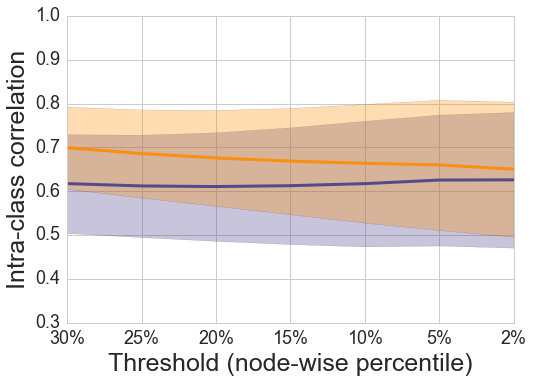

In [36]:
file_name ='/scr/hunte1/sabine/distconnect/figures/images/suppl_icc'

sns.set(style="whitegrid")
fig, ax = plt.subplots()
cols = ['darkslateblue', 'darkorange']

for n_dist, dist in enumerate(['geo', 'eucl']):

    # set params
    dep_var = "trt2_%s_icc" % dist
    indep_var = "threshold"
    indep_val_levels = ['70','75','80','85','90','95','98']
    x_labelticks = ['30%', '25%', '20%', '15%', '10%', '5%', '2%']
    x = np.arange(0, len(indep_val_levels), 1)

    # get data
    arr = np.zeros((18715,7))
    for n, thr in enumerate(indep_val_levels):    
        arr[:,n] = df[dep_var][(df[indep_var] == thr)
                               &(df['networks of Yeo & Krienen 2011 (7 networks solution)'] != 'medial wall')]

    # calculate mean, and upper/lower bound based on stand dev
    m = np.mean(arr, axis=0)
    high = m + np.std(arr, axis=0)
    low = m - np.std(arr, axis=0)

    # plot
    
    ax.plot(m, color=cols[n_dist], lw=3, alpha=.9)
    ax.plot(low, alpha=0)
    ax.plot(high, alpha=0)
    ax.fill_between(x, low, high, facecolor=cols[n_dist], alpha=.3)
    
    
plt.ylim(.3,1)
plt.ylabel('Intra-class correlation', fontsize=25)
plt.yticks(fontsize=18)

ax.set_xticklabels(x_labelticks, fontsize=18)
plt.xlabel('Threshold (node-wise percentile)', fontsize=25)
fig.savefig('%s.png' %file_name, bbox_inches='tight', dpi=600)